In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df=pd.read_csv('123.csv')

In [3]:
# Detecting NULL 
df.isnull()
df.isnull
series = pd.isnull(df["mathScore"])
df[series]

df.notnull()
df.notnull
series = pd.notnull(df["mathScore"])
df[series]

,srno,mathScore,WritingScore(60-80),ReadingScore(60-80),PlacementScore(75-90),JoiningDate(2018-2021)
0,1,73.0,75.0,63.0,5,2018
1,2,73.0,80.0,71.0,88,2021
4,5,64.0,78.0,77.0,80,2021
5,6,62.0,67.0,65.0,81,2018
6,7,65.0,68.0,NaN,78,2021
...,...,...,...,...,...,...
131,132,70.0,72.0,69.0,82,2019
132,133,60.0,77.0,72.0,80,2019
133,134,63.0,NaN,80.0,84,2021
135,136,79.0,NaN,71.0,77,2021


In [4]:
missing_values = ["Na", "na"]      # replace values in array with NULL
df = pd.read_csv("123.csv", na_values = missing_values)      # For replacing null values with NaN

In [5]:
# ndf=df      # pointer
ndf=pd.read_csv("123.csv", na_values = missing_values)     
# ndf=df.copy()from scipy import stats

# * Filling null values  fillna()
# ndf=ndf.fillna(0)            # single value
# ndf['mathScore'] = ndf['mathScore'].fillna(ndf['mathScore'].min())      # rpeplace null with minimum
# ndf['mathScore'] = ndf['mathScore'].fillna(ndf['mathScore'].max())        # rpeplace null with maxmum
# ndf['mathScore'] = ndf['mathScore'].fillna(ndf['mathScore'].mean())       # rpeplace null with mean
# m_v = ndf['mathScore'].mean()
# ndf['mathScore'].fillna(value=m_v,inplace=True)         # Filling null values in dataset
# ndf

# * Filling a null values using replace() method
# ndf.replace(to_replace = np.nan, value = -99)

# * Deleting null values using dropna() method
# ndf.dropna()      # To drop rows with at least 1 null value
# ndf.dropna(how='all')      # To Drop rows if all values in that row are missing
# ndf.dropna(axis = 1)       # To Drop columns with at least 1 null value.
# new_data = ndf.dropna(axis = 0, how ='any')     # same as  ndf.dropna()  just explicit i.e just default values written
# new_data


In [6]:
#   Outliers

<Axes: >

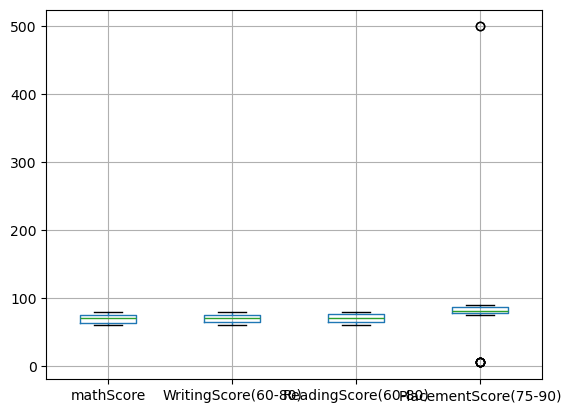

In [7]:
# * Detecting outliers using Boxplot:
df = pd.read_csv("123.csv", na_values = missing_values)  
col = ['mathScore', 'WritingScore(60-80)' , 'ReadingScore(60-80)','PlacementScore(75-90)']
df.boxplot(col)

In [8]:
print(np.where(df['mathScore']>75))
print(np.where(df['ReadingScore(60-80)']<65))
print(np.where(df['WritingScore(60-80)']<70))

(array([  8,  12,  13,  16,  18,  28,  31,  33,  36,  45,  52,  55,  64,
        67,  68,  69,  77,  81,  95, 118, 120, 122, 129, 135]),)
(array([  0,   2,   3,   8,   9,  34,  36,  37,  41,  46,  53,  55,  57,
        60,  73,  75,  79,  88,  93, 100, 111, 112, 120, 122, 136]),)
(array([  2,   3,   5,   6,  15,  16,  27,  31,  32,  33,  35,  36,  37,
        44,  45,  48,  51,  52,  55,  56,  57,  58,  60,  64,  65,  69,
        71,  76,  80,  83,  85,  86,  87,  94,  95,  98, 100, 103, 105,
       106, 107, 112, 117, 120, 122, 124, 127, 130, 134, 136]),)


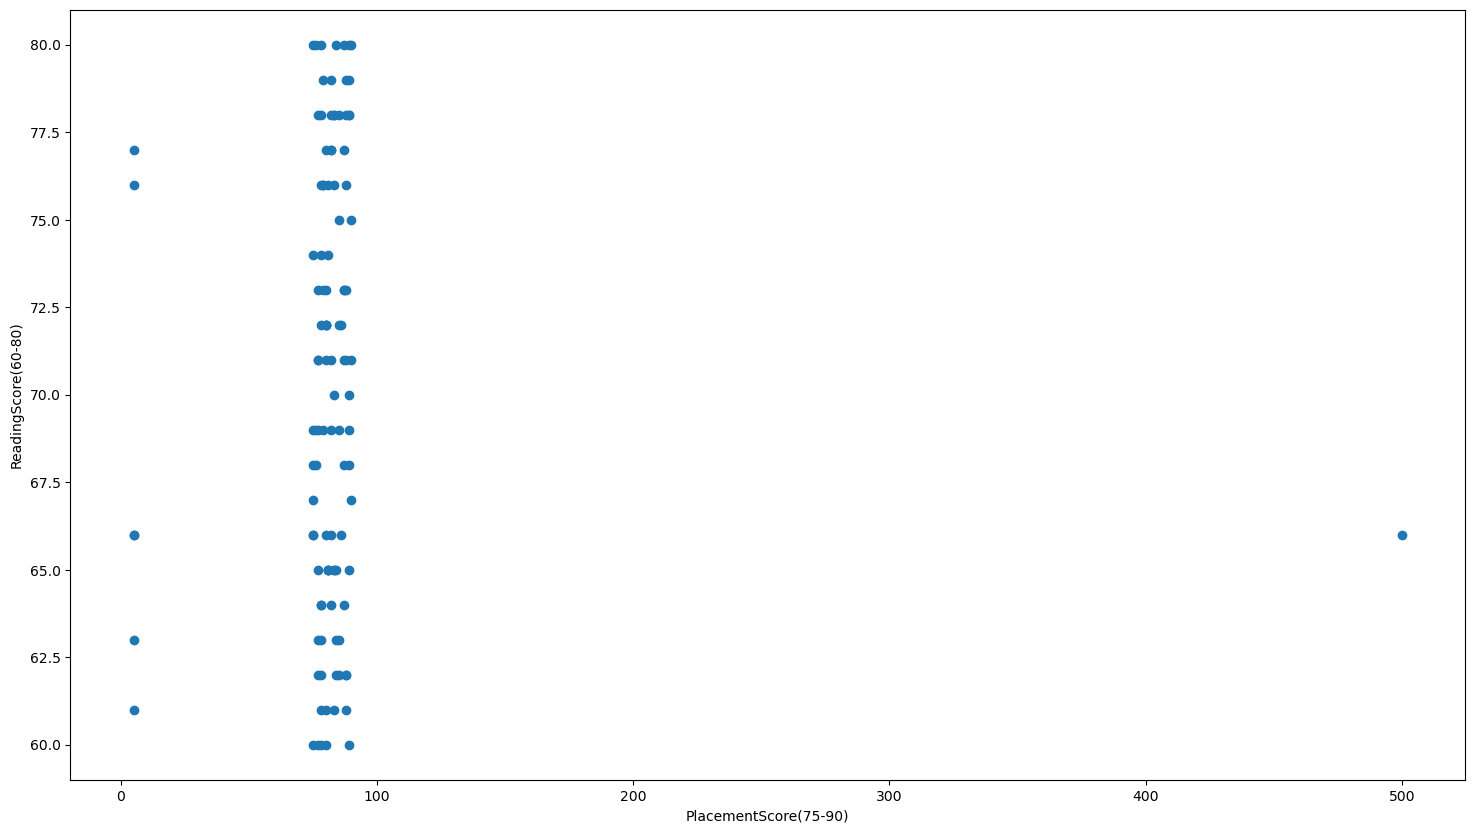

In [9]:
# * Detecting outliers using Scatterplot:
df = pd.read_csv("123.csv", na_values = missing_values)  
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['PlacementScore(75-90)'], df['ReadingScore(60-80)'])
ax.set_xlabel('PlacementScore(75-90)')
ax.set_ylabel('ReadingScore(60-80)')
plt.show()

In [10]:
print(np.where((df['PlacementScore(75-90)']<75)))
print(np.where((df['PlacementScore(75-90)']>90)))

(array([  0,  38,  42,  70, 109, 111, 119]),)
(array([17, 61]),)


In [11]:
# * Detecting outliers using Z-Score:
# Zscore = (data_point -mean) / std. deviation

In [12]:
df = pd.read_csv("123.csv", na_values = missing_values) 
df=df.fillna(0) 
z=np.abs(stats.zscore(df['PlacementScore(75-90)']))
print(z)
threshold=0.05
sample_outliers=np.where(z<threshold)
sample_outliers

[1.48543141e+00 7.00752065e-02 1.17335229e-01 4.88896790e-03
 7.98531423e-02 6.11120987e-02 1.17335229e-01 2.36300115e-02
 7.00752065e-02 1.36076273e-01 7.00752065e-02 5.13341629e-02
 4.23710551e-02 4.88896790e-03 1.73558360e-01 1.36076273e-01
 1.17335229e-01 7.79138517e+00 4.23710551e-02 4.88896790e-03
 1.07557294e-01 8.88162501e-02 1.17335229e-01 4.23710551e-02
 1.73558360e-01 4.88896790e-03 1.54817317e-01 1.73558360e-01
 3.25931193e-02 8.88162501e-02 2.36300115e-02 6.11120987e-02
 1.36076273e-01 1.38520757e-02 1.36076273e-01 7.98531423e-02
 1.17335229e-01 1.38520757e-02 1.48543141e+00 4.23710551e-02
 1.54817317e-01 1.36076273e-01 1.48543141e+00 1.73558360e-01
 9.85941859e-02 1.54817317e-01 2.36300115e-02 4.23710551e-02
 5.13341629e-02 5.13341629e-02 1.38520757e-02 5.13341629e-02
 7.00752065e-02 1.73558360e-01 6.11120987e-02 1.17335229e-01
 4.23710551e-02 7.98531423e-02 3.25931193e-02 7.98531423e-02
 7.00752065e-02 7.79138517e+00 1.17335229e-01 9.85941859e-02
 2.36300115e-02 4.237105

(array([  3,   7,  12,  13,  18,  19,  23,  25,  28,  30,  33,  37,  39,
         46,  47,  50,  56,  58,  64,  65,  67,  69,  71,  78,  80,  82,
         88, 113, 115, 120, 129, 131, 133, 136, 137]),)

In [13]:
# * Detecting outliers using Inter Quantile Range(IQR):
# IQR = Quartile3 – Quartile1
# upper = Q3 +1.5*IQR
# lower = Q1 – 1.5*IQR

In [14]:
sorted_rscore=sorted(df['PlacementScore(75-90)'])
print(sorted_rscore)

[5, 5, 5, 5, 5, 5, 5, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 79, 79, 79, 79, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 500, 500]


In [15]:
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)
IQR = q3-q1    # calcuate IQR
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound, upr_bound)

78.0 86.0
66.0 98.0


In [16]:
# print outliers
r_outliers = []
for i in sorted_rscore:
 if (i<lwr_bound or i>upr_bound):
  r_outliers.append(i)
print(r_outliers)

[5, 5, 5, 5, 5, 5, 5, 500, 500]


In [17]:
# Handling Outliers
# ● Trimming/removing the outlier
# ● Quantile based flooring and capping
# ● Mean/Median imputation

In [18]:
# * Trimming/removing the outlier

In [19]:
df = pd.read_csv("123.csv", na_values = missing_values) 
df=df.fillna(0) 
z=np.abs(stats.zscore(df['PlacementScore(75-90)']))
threshold=0.05
sample_outliers=np.where(z<threshold)
new_df=df
for i in sample_outliers:
  new_df.drop(i,inplace=True)
new_df

,srno,mathScore,WritingScore(60-80),ReadingScore(60-80),PlacementScore(75-90),JoiningDate(2018-2021)
0,1,73.0,75.0,63.0,5,2018
1,2,73.0,80.0,71.0,88,2021
2,3,0.0,68.0,60.0,78,2018
4,5,64.0,78.0,77.0,80,2021
5,6,62.0,67.0,65.0,81,2018
...,...,...,...,...,...,...
128,129,0.0,77.0,80.0,90,2021
130,131,66.0,60.0,0.0,80,2020
132,133,60.0,77.0,72.0,80,2019
134,135,0.0,61.0,71.0,80,2019


In [20]:
# * Quantile based flooring and capping:

In [21]:
df = pd.read_csv("123.csv", na_values = missing_values) 
df=df.fillna(0)
ninetieth_percentile = np.percentile(df['PlacementScore(75-90)'], 90)
tenth_percentile = np.percentile(df['PlacementScore(75-90)'], 10)
# b = np.where(df['PlacementScore(75-90)']>ninetieth_percentile,ninetieth_percentile, df['PlacementScore(75-90)'])
# b = np.where(df['PlacementScore(75-90)']<tenth_percentile,tenth_percentile, df['PlacementScore(75-90)'])
b=np.clip(df['PlacementScore(75-90)'],tenth_percentile,ninetieth_percentile)
print("New array:",b)
df.insert(1,"p Score",b,True)
df

New array: 0      75
1      88
2      78
3      84
4      80
       ..
133    84
134    80
135    77
136    84
137    82
Name: PlacementScore(75-90), Length: 138, dtype: int64


,srno,p Score,mathScore,WritingScore(60-80),ReadingScore(60-80),PlacementScore(75-90),JoiningDate(2018-2021)
0,1,75,73.0,75.0,63.0,5,2018
1,2,88,73.0,80.0,71.0,88,2021
2,3,78,0.0,68.0,60.0,78,2018
3,4,84,0.0,68.0,62.0,84,2020
4,5,80,64.0,78.0,77.0,80,2021
...,...,...,...,...,...,...,...
133,134,84,63.0,0.0,80.0,84,2021
134,135,80,0.0,61.0,71.0,80,2019
135,136,77,79.0,0.0,71.0,77,2021
136,137,84,61.0,65.0,63.0,84,2018


In [22]:
# Mean/Median imputation

In [23]:
df = pd.read_csv("123.csv", na_values = missing_values)  
df.fillna(0)
col = ['PlacementScore(75-90)']
df.boxplot(col)

<Axes: >

In [24]:
median=np.median(sorted_rscore)
median
# Replace the upper bound outliers using median value
refined_df=df
refined_df['PlacementScore(75-90)'] = np.where(refined_df['PlacementScore(75-90)'] >upr_bound, median,refined_df['PlacementScore(75-90)'])
# refined_df['PlacementScore(75-90)'] = np.where(refined_df['PlacementScore(75-90)'] <lwr_bound, median,refined_df['PlacementScore(75-90)'])
col = ['PlacementScore(75-90)']
refined_df.boxplot(col)

<Axes: >

In [25]:
# Data Transformation for the purpose

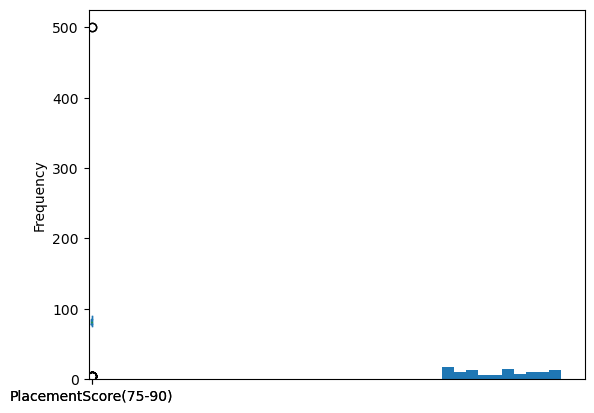

In [26]:
# To decrease the skewness and convert distribution into normal distribution
new_df=pd.read_csv('123.csv')
new_df['mathScore'].plot(kind = 'hist')
plt.show()

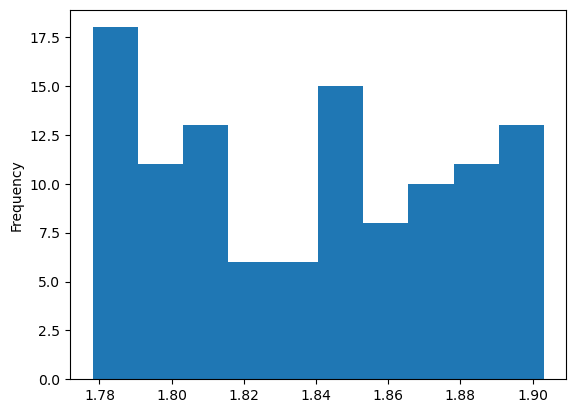

In [27]:
df['log_math'] = np.log10(df['mathScore'])
df['log_math'].plot(kind = 'hist')
plt.show()